In [1]:
import random
import os
import sys
import time
import numpy as np
import math

In [2]:
from ConvexCGen import *
from ConvexEA_MC import *

In [3]:
import subprocess
BLENDER_PATH="C:\\Program Files\\Blender Foundation\\Blender 3.3\\blender.exe"

In [4]:
OUTPUT_PATH="E:\\Research\\Statue Generator\\Generations"

In [5]:
def shannon_entropy(file_path):
    with open(file_path, "rb") as f:
        bytes = f.read()
    prob = [float(bytes.count(b)) / len(bytes) for b in set(bytes)]
    entropy = -sum([p * math.log(p) / math.log(2.0) for p in prob])
    return round(entropy,6)

In [6]:
def gen_blender(ARR,GEN_NUM):
    
    os.mkdir(OUTPUT_PATH+"\\GEN_"+str(GEN_NUM))
    
    for i,C in enumerate(ARR):

        RO=C[0]
        VERTS=C[1][0]
        FACES=C[1][1]
        MATERIALS=C[1][2]
        FILE_NUM=str(i)
        
        with open(f'{OUTPUT_PATH}\\GEN_{GEN_NUM}\\VERTS_G{GEN_NUM}_S{i}.txt', 'w') as f:
            f.writelines(str(VERTS))
        
        with open(f'{OUTPUT_PATH}\\GEN_{GEN_NUM}\\FACES_G{GEN_NUM}_S{i}.txt', 'w') as f:
            f.writelines(str(FACES))
            
        with open(f'{OUTPUT_PATH}\\GEN_{GEN_NUM}\\MATERIALS_G{GEN_NUM}_S{i}.txt', 'w') as f:
            f.writelines(str(MATERIALS))

        subprocess.run(["blender", "--background", "--python","convexGeneratePopulation.py",FILE_NUM,f'VERTS_G{GEN_NUM}_S{i}.txt',f'FACES_G{GEN_NUM}_S{i}.txt',f'MATERIALS_G{GEN_NUM}_S{i}.txt',str(RO),str(OUTPUT_PATH+"\\GEN_"+str(GEN_NUM))],capture_output=True,shell=True)
        time.sleep(90)
        
        #print(f'Statue {i} Saved!')

## Basic Parameters for generation

In [7]:
L,B,H=10,10,20
POPULATION_SIZE=10

In [8]:
PARAMS=[]

## Initial Population

In [9]:
%%time

INITIAL_POPULATION=[]

for _ in range(POPULATION_SIZE):
    CH=generate_chromosome(L,B,H)
    INITIAL_POPULATION.append(CH)
    get_stats(CH)
    print('-'*125)

PARAMS.append(INITIAL_POPULATION)

Roughness Factor = 4
Number of vertices = 24
Number of faces = 26
Number of materials = 26
New Bounding Box - (L,B,H) = (8.266158,7.401179,10.649494)
-----------------------------------------------------------------------------------------------------------------------------
Roughness Factor = 0
Number of vertices = 6
Number of faces = 6
Number of materials = 6
New Bounding Box - (L,B,H) = (6.320272,8.535186,19.406612)
-----------------------------------------------------------------------------------------------------------------------------
Roughness Factor = 4
Number of vertices = 18
Number of faces = 18
Number of materials = 18
New Bounding Box - (L,B,H) = (2.682267,7.515216,17.722211)
-----------------------------------------------------------------------------------------------------------------------------
Roughness Factor = 1
Number of vertices = 4
Number of faces = 4
Number of materials = 4
New Bounding Box - (L,B,H) = (8.568493,2.775505,4.518795)
-----------------------------

In [ ]:
%%time

os.mkdir(OUTPUT_PATH+"\\GEN_0")

for i,C in enumerate(PARAMS[0]):

    RO=C[0]
    VERTS=C[1][0]
    FACES=C[1][1]
    MATERIALS=C[1][2]
    FILE_NUM=str(i)
    
    with open(f'{OUTPUT_PATH}\\GEN_0\\VERTS_G{0}_S{i}.txt', 'w') as f:
        f.writelines(str(VERTS))
        
    with open(f'{OUTPUT_PATH}\\GEN_0\\FACES_G{0}_S{i}.txt', 'w') as f:
        f.writelines(str(FACES))
        
    with open(f'{OUTPUT_PATH}\\GEN_{0}\\MATERIALS_G{0}_S{i}.txt', 'w') as f:
            f.writelines(str(MATERIALS))

    #subprocess.run(["blender", "--background", "--python","convexGeneratePopulation.py",FILE_NUM,f'VERTS_G{GEN_NUM}_S{i}.txt',f'FACES_G{GEN_NUM}_S{i}.txt',f'MATERIALS_G{GEN_NUM}_S{i}.txt',str(RO),str(OUTPUT_PATH+"\\GEN_"+str(GEN_NUM))],capture_output=True,shell=True)

    subprocess.run(["blender", "--background", "--python","convexGeneratePopulation.py",FILE_NUM,f'VERTS_G{0}_S{i}.txt',f'FACES_G{0}_S{i}.txt',f'MATERIALS_G{0}_S{i}.txt',str(RO),str(OUTPUT_PATH+"\\GEN_0")],capture_output=True,shell=True)
    #print(subprocess.run(["blender", "--background", "--python","generatePopulation.py",FILE_NUM,COLOUR,f'VERTS_G{0}_S{i}.txt',f'FACES_G{0}_S{i}.txt',str(RO),str(OUTPUT_PATH+"\\GEN_0")],capture_output=True,shell=True))
    time.sleep(90)
    
    print(f'Statue {i} Saved!')
    

## Crossover and Mutation for more generations

In [20]:
GENERATIONS=2

In [21]:
%%time

ALL_FITNESS=[]
BEST_FITNESS=[]
GEN_NUM=1

for _ in range(GENERATIONS):
    
    PATH_FOR_PREV_GEN=OUTPUT_PATH+"\\GEN_"+str(GEN_NUM-1)
    FITNESS=[]
    
    for i in range(POPULATION_SIZE):
        VERTS=PARAMS[GEN_NUM-1][i][1][0]
        FACES=PARAMS[GEN_NUM-1][i][1][1]
        
        gr=golden_ratio(np.array(VERTS),np.array(FACES))
        gr=gr/100
        
        entropy=shannon_entropy(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
        entropy=entropy/8
        
        fitness=gr+(1/entropy)
        FITNESS.append(round(fitness,6))
    
    ALL_FITNESS.append(FITNESS)
    
    BEST_FITNESS.append(FITNESS.index(max(FITNESS)))
    print(f'Statue-{FITNESS.index(max(FITNESS))} has the best fitness value in {GEN_NUM-1} generation.')
    
    MODELS=[]
    
    for _ in range(int(POPULATION_SIZE/2)):
    
        #selecting 2 random parents from previous generation
        idx1,idx2=random.randint(0,POPULATION_SIZE-1),random.randint(0,POPULATION_SIZE-1)
        p1=idx1 if FITNESS[idx1]>FITNESS[idx2] else idx2
        
        idx3,idx4=random.randint(0,POPULATION_SIZE-1),random.randint(0,POPULATION_SIZE-1)
        p2=idx3 if FITNESS[idx3]>FITNESS[idx4] else idx4
        
        #perform crossover for the selected parents
        c1,c2=crossover(PARAMS[GEN_NUM-1][p1],PARAMS[GEN_NUM-1][p2])
        
        #mutate the children after crossover
        m1=mutate(c1,L,B,H)
        m2=mutate(c2,L,B,H)
        
        MODELS.append(m1)
        MODELS.append(m2)
        
    #print(len(MODELS))
    #appending the mutated childs to PARAMS array
    PARAMS.append(MODELS)
    
    #generate blender file
    gen_blender(MODELS,GEN_NUM)
    
    print(f"Generation {GEN_NUM} generated successfully!")
    print("-"*120)
    
    GEN_NUM+=1

Statue-1 has the best fitness value in 0 generation.
Generation 1 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Statue-6 has the best fitness value in 1 generation.
Generation 2 generated successfully!
------------------------------------------------------------------------------------------------------------------------
Wall time: 31min 30s


In [27]:
%%time
PATH_FOR_PREV_GEN=OUTPUT_PATH+"\\GEN_"+str(GENERATIONS)
FINAL_FITNESS=[]

for i in range(POPULATION_SIZE):
    VERTS=PARAMS[GENERATIONS][i][1][0]
    FACES=PARAMS[GENERATIONS][i][1][1]

    gr=golden_ratio(np.array(VERTS),np.array(FACES))
    gr=gr/100

    entropy=shannon_entropy(PATH_FOR_PREV_GEN+f"\\STATUE_{i}.blend")
    entropy=entropy/8

    FINAL_FITNESS.append(round(gr+entropy,6))

Wall time: 3.81 s


In [28]:
FINAL_FITNESS

[-9.001822,
 -2.375007,
 -0.937936,
 -3.166744,
 0.565408,
 -2.62533,
 -0.154627,
 -1.386257,
 -2.123984,
 0.565156]

In [40]:
ALL_FITNESS.append(FINAL_FITNESS)

In [41]:
FINAL_FITNESS.index(max(FINAL_FITNESS))

4

## Plot fitness

In [42]:
import matplotlib.pyplot as plt
def plot_fitness(fitness):
    
    best_values=[]
    for g in fitness:
        best_values.append(max(g))
    
    plt.figure(figsize=(20,10))
    plt.plot(best_values)
    plt.xlabel("Generation")
    plt.ylabel("Fitness")
    plt.show()

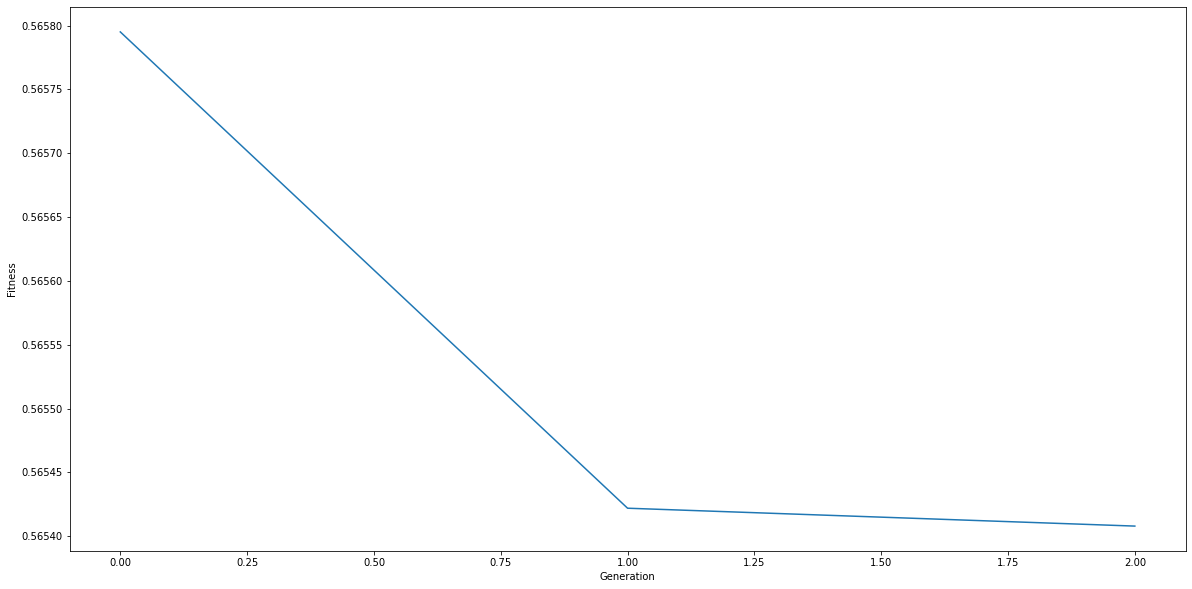

In [43]:
plot_fitness(ALL_FITNESS)

## Saving the parameters

In [39]:
with open(f'E:\Research\Statue gen output\\CONVEX_HULL_Entropy_2Gen.txt', 'w') as f:
        f.writelines(str(PARAMS))